In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt 
from scipy.io import loadmat
from IPython.display import Image

In [4]:
path=r"C:\Users\王飘鸿\Desktop\机器学习\吴恩达作业\machine-learning-ex7\ex7"
path1=path+"/ex7data2.mat"

In [5]:
data1=loadmat(path1)

In [6]:
data1=data1["X"]

In [7]:
data1[:5]

array([[1.84207953, 4.6075716 ],
       [5.65858312, 4.79996405],
       [6.35257892, 3.2908545 ],
       [2.90401653, 4.61220411],
       [3.23197916, 4.93989405]])

In [8]:
def find_closest_centroid(data,centroid):
    belong_centroid=[]
    orign_data=data
    orign_centroid=centroid
    data=np.matrix(data)
    centroid=np.matrix(centroid)
    for i in range(len(data)):
        closest_distance=(data[i]-centroid[0]).dot((data[i]-centroid[0]).T)
        belong_centroid.append(0)
        for j in range(len(centroid)):
            distance=(data[i]-centroid[j]).dot((data[i]-centroid[j]).T)
            if(distance< closest_distance):
                closest_distance=distance
                belong_centroid[i]=j
    return np.array(belong_centroid)

In [9]:
belong_centroid=find_closest_centroid(data=data1,centroid=np.array([[3, 3], [6, 2], [8, 5]]))

In [10]:
belong_centroid[:10]

array([0, 2, 1, 0, 0, 0, 0, 0, 0, 0])

In [11]:
#########最小距离函数模块测试成功
#########展示数据

In [12]:
np.mean(data1[np.where(belong_centroid==0)],axis=0)

array([2.42830111, 3.15792418])

In [13]:
def caculate_centroid(data,centroid,belong_centroid):
    for i in range(len(centroid)):
        centroid[i]=np.mean(data[np.where(belong_centroid==i)],axis=0)
    return centroid

In [14]:
caculate_centroid(data=data1,centroid=[0,1,2],belong_centroid=belong_centroid)

[array([2.42830111, 3.15792418]),
 array([5.81350331, 2.63365645]),
 array([7.11938687, 3.6166844 ])]

In [15]:
def k_means(data,init_centroid,iters):
    belong_centroid=find_closest_centroid(data=data,centroid=init_centroid)
    centroid=caculate_centroid(data=data,centroid=init_centroid,belong_centroid=belong_centroid)
    for i in range(iters):
        belong_centroid=find_closest_centroid(data=data,centroid=centroid)
        centroid=caculate_centroid(data=data,centroid=centroid,belong_centroid=belong_centroid)
    return belong_centroid,centroid

In [16]:
belong_centroid,centroid=k_means(data=data1,init_centroid=np.array([[3, 3], [6, 2], [8, 5]]),iters=3)

In [17]:
def plot_data(data, belong_centroid):
    fig,ax=plt.subplots(figsize=(3,5))
    ax.scatter(x=data1[np.where(belong_centroid==0)][:,0],y=data1[np.where(belong_centroid==0)][:,1],c="r")
    ax.scatter(x=data1[np.where(belong_centroid==1)][:,0],y=data1[np.where(belong_centroid==1)][:,1],c="b")
    ax.scatter(x=data1[np.where(belong_centroid==2)][:,0],y=data1[np.where(belong_centroid==2)][:,1],c="g")
    plt.show()

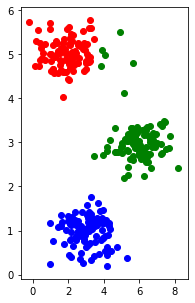

In [18]:
plot_data(data=data1, belong_centroid=belong_centroid)
#############效果还算ok

In [19]:
#################生成随机初始中心点的函数
#################是从已有的数据中挑出点来做圆心

In [20]:
def random_init(data,centroid_number):
    init_number=np.random.randint(0,len(data),centroid_number)
    return data[init_number]

In [21]:
random_init(data=data1,centroid_number=3)

array([[3.30063655, 1.28107588],
       [2.79588724, 0.99526664],
       [2.53446019, 1.21562081]])

In [22]:
#############开始做第二部分，图片降维

In [23]:
path2=path+"/bird_small.png"

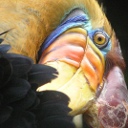

In [24]:
Image(path2)

In [25]:
data2=loadmat(path+"/bird_small.mat")['A']
orign_data2=loadmat(path+"/bird_small.mat")['A']

In [26]:
orign_data2=loadmat(path+"/bird_small.mat")['A']

In [27]:
#####数据处理
data2
data2=data2/255
data2=data2.reshape(data2.shape[0]*data2.shape[1],data2.shape[2])

In [28]:
data2

array([[0.85882353, 0.70588235, 0.40392157],
       [0.90196078, 0.7254902 , 0.45490196],
       [0.88627451, 0.72941176, 0.43137255],
       ...,
       [0.25490196, 0.16862745, 0.15294118],
       [0.22745098, 0.14509804, 0.14901961],
       [0.20392157, 0.15294118, 0.13333333]])

In [29]:
data2.shape

(16384, 3)

In [30]:
init_centroids2=random_init(data=data2,centroid_number=16)

In [31]:
init_centroids2

array([[0.85098039, 0.7372549 , 0.76470588],
       [0.74117647, 0.56470588, 0.25490196],
       [0.51372549, 0.37254902, 0.36862745],
       [0.92156863, 0.45882353, 0.26666667],
       [0.11764706, 0.1254902 , 0.14117647],
       [0.60784314, 0.50980392, 0.49411765],
       [0.51764706, 0.5254902 , 0.38039216],
       [0.26666667, 0.22745098, 0.22352941],
       [0.20392157, 0.19607843, 0.2       ],
       [0.96470588, 0.95294118, 0.83921569],
       [0.78039216, 0.64705882, 0.41568627],
       [0.79607843, 0.71372549, 0.68235294],
       [0.58431373, 0.49803922, 0.42745098],
       [0.11764706, 0.11764706, 0.09803922],
       [0.99215686, 0.79215686, 0.64313725],
       [0.58039216, 0.54509804, 0.51764706]])

In [32]:
belong_centroid=find_closest_centroid(data=data2,centroid=init_centroids2)

In [33]:
belong_centroid.shape

(16384,)

In [34]:
belong_centroid

array([10, 10, 10, ...,  8,  8,  8])

In [35]:
belong_centroid2,centroid2=k_means(data=data2,init_centroid=init_centroids2,iters=10)

In [36]:
x2_zip=np.reshape(centroid2[belong_centroid2],(orign_data2.shape[0],orign_data2.shape[1],orign_data2.shape[2]))

In [37]:
x2_zip

array([[[0.85615459, 0.70876044, 0.44658142],
        [0.85615459, 0.70876044, 0.44658142],
        [0.85615459, 0.70876044, 0.44658142],
        ...,
        [0.07857306, 0.0850892 , 0.07465606],
        [0.07857306, 0.0850892 , 0.07465606],
        [0.07857306, 0.0850892 , 0.07465606]],

       [[0.85615459, 0.70876044, 0.44658142],
        [0.85615459, 0.70876044, 0.44658142],
        [0.85615459, 0.70876044, 0.44658142],
        ...,
        [0.07857306, 0.0850892 , 0.07465606],
        [0.07857306, 0.0850892 , 0.07465606],
        [0.07857306, 0.0850892 , 0.07465606]],

       [[0.85615459, 0.70876044, 0.44658142],
        [0.85615459, 0.70876044, 0.44658142],
        [0.85615459, 0.70876044, 0.44658142],
        ...,
        [0.07857306, 0.0850892 , 0.07465606],
        [0.07857306, 0.0850892 , 0.07465606],
        [0.07857306, 0.0850892 , 0.07465606]],

       ...,

       [[0.07857306, 0.0850892 , 0.07465606],
        [0.07857306, 0.0850892 , 0.07465606],
        [0.07857306, 0

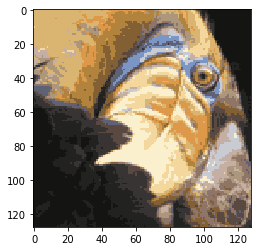

In [38]:
plt.imshow(x2_zip)
###########################压缩成功

In [39]:
##############下面是PCA部分

In [40]:
path=r"C:\Users\王飘鸿\Desktop\机器学习\吴恩达作业\machine-learning-ex7\ex7"

In [41]:
path3=path+"/ex7data1.mat"

In [42]:
data3=loadmat(path3)["X"]

In [43]:
data3[:10]

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929]])

In [44]:
def plot_init_data3(data):
    fig,ax=plt.subplots(figsize=(12,8))
    ax.scatter(x=data3[:,0],y=data3[:,1],c="r")
    plt.show()

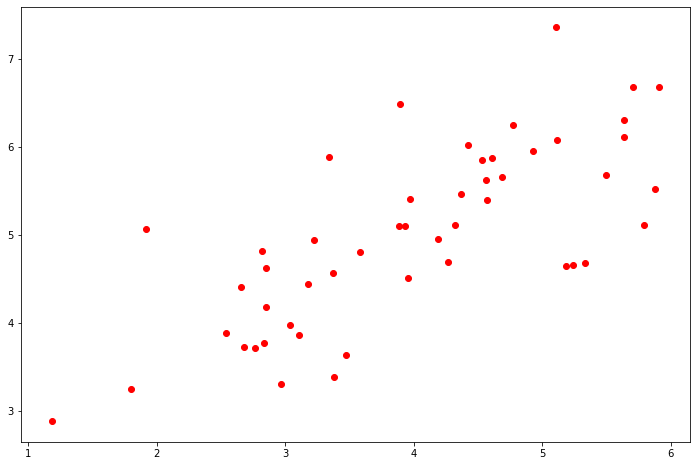

In [45]:
plot_init_data3(data=data3)

In [76]:
data3[:10]

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929]])

In [77]:
data3.mean(axis=0)

array([3.98926528, 5.00280585])

In [78]:
data3.std(axis=0)

array([1.16126017, 1.01312201])

In [82]:
np.mean((data3-data3.mean(axis=0))/data3.std(axis=0),axis=0)

array([-1.17683641e-16,  1.12354570e-15])

In [97]:
#####不调包纯pyhton数值计算
def caculate_pcb(data,principal_k):
    processed_data=np.matrix((data-data.mean(axis=0))/(data.std(axis=0)))
    caculated_data=(processed_data.T).dot(processed_data)/processed_data.shape[0]
    eigenvalue,featurevector=np.linalg.eig(caculated_data)
    return eigenvalue,featurevector

In [148]:
def caculate_pcb(data):
    processed_data=np.matrix(data.T)
    caculated_data=(processed_data.T).dot(processed_data)
    eigenvalue,featurevector=np.linalg.eig(caculated_data)
    
    V=featurevector.T
    eigenvalue=np.sqrt(eigenvalue)
    U=processed_data*V
    return U

In [147]:
data3

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929],
       [4.57407171, 5.39765069],
       [4.37173356, 5.46116549],
       [4.19169388, 4.95469359],
       [5.24408518, 4.66148767],
       [2.8358402 , 3.76801716],
       [5.63526969, 6.31211438],
       [4.68632968, 5.6652411 ],
       [2.85051337, 4.62645627],
       [5.1101573 , 7.36319662],
       [5.18256377, 4.64650909],
       [5.70732809, 6.68103995],
       [3.57968458, 4.80278074],
       [5.63937773, 6.12043594],
       [4.26346851, 4.68942896],
       [2.53651693, 3.88449078],
       [3.22382902, 4.94255585],
       [4.92948801, 5.95501971],
       [5.79295774, 5.10839305],
       [2.81684824, 4.81895769],
       [3.88882414, 5.10036564],
       [3.

In [111]:
def caculate_norm(vector):
    return 

18.838273471359997